In [100]:
import CellModeller
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sets import Set

In [215]:
nx = 32
ncells = nx**2
pos = np.zeros((nx,nx,2))
for i in range(nx):
    for j in range(nx):
        pos[i,j,:] = np.array([i,j]).astype(np.float32)
pos = pos.reshape((ncells,2))
pos *= 1.8


(-2.7900000000000005,
 58.590000000000003,
 -2.7900000000000005,
 58.590000000000003)

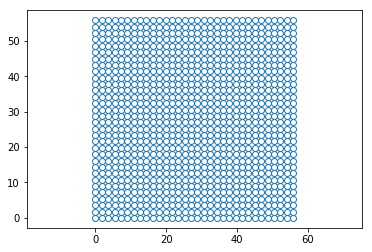

In [216]:

plt.plot(pos[:,0], pos[:,1],  'o', markersize=6, mfc='none')
plt.axis('equal')

In [217]:
pos2 = pos # + (np.random.random(size=pos.shape) - 0.5)
pos2_init = pos2.copy()

(-2.7900000000000005,
 58.590000000000003,
 -2.7900000000000005,
 58.590000000000003)

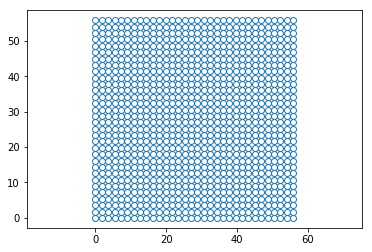

In [218]:
plt.plot(pos2[:,0], pos2[:,1],  'o', markersize=6, mfc='none')
#plt.plot(pos[:,0], pos[:,1],  'ro', markersize=13, mfc='none')
plt.axis('equal')

In [308]:
# Find all contact pairs by exhaustive search
contacts = Set()
contacts2 = Set()
for i in range(ncells):
    for j in range(i+1,ncells):
        ct = Set((i,j))
        if np.linalg.norm(pos[i,:]-pos[j,:])<=2:
            contacts.add(ct)
        if np.linalg.norm(pos2[i,:]-pos2[j,:])<=2:
            contacts2.add(ct)

In [309]:
len(contacts2)

973

In [219]:
# Find contacts by traversing neighbours and their neighbours
cts2 = {}
numtests = 0
for i in range(nx):
    for j in range(nx):
        idx = i + j*nx
        cts2[idx] = Set()
        #print "idx = ", idx
        # Loop over neighbours
        for di in [-1,0,1]:
            if i+di>=0 and i+di<nx:
                for dj in [-1,0,1]:
                    if j+dj>=0 and j+dj<nx:
                        idx2 = i+di + (j+dj)*nx
                        ct = Set((idx,idx2))
                        if idx2!=idx:
                            #print "idx2 = ", idx2
                            d2 = np.linalg.norm(pos2[idx,:]-pos2[idx2,:])
                            numtests += 1
                            if d2<=2:
                                #print "d2 = ", d2
                                cts2[idx].add(idx2)
                        # Traverse this cells neighbours too
                        for ddi in [-1,0,1]:
                            if i+di+ddi>=0 and i+di+ddi<nx:
                                for ddj in [-1,0,1]:
                                    if j+dj+ddj>=0 and j+dj+ddj<nx:
                                        idx3 = i+di+ddi + (j+dj+ddj)*nx
                                        ct = Set((idx,idx3))
                                        if idx3!=idx:
                                            d3 = np.linalg.norm(pos2[idx,:]-pos2[idx3,:])
                                            numtests += 1
                                            if d3<=2:
                                                #print "idx3 = ", idx3
                                                cts2[idx].add(idx3)


In [220]:
len(cts2)

1024

In [221]:
numtests

76260

In [222]:
ncells*(ncells-1)*0.5

523776.0

In [223]:
2*nx*(nx-1)

1984

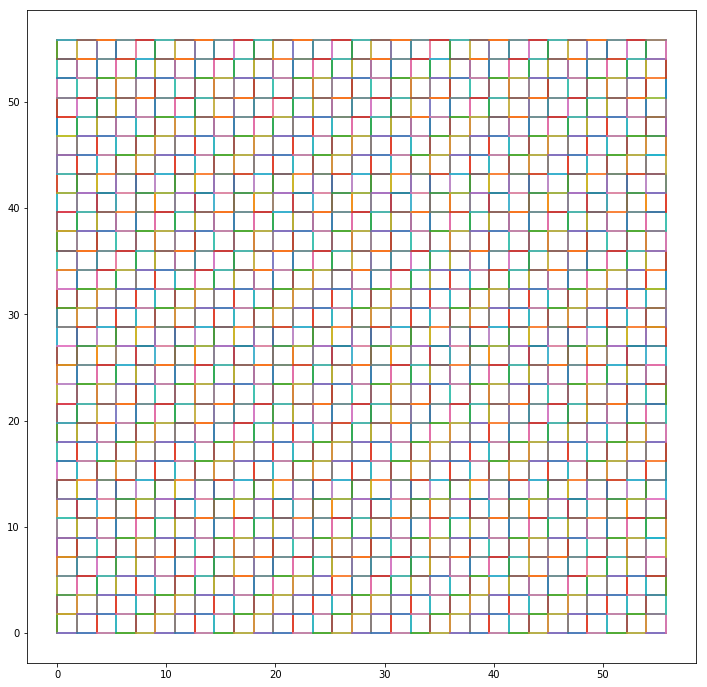

In [224]:
plt.figure(figsize=(12,12))
#cts2 == contacts2
for (idx,cts) in cts2.iteritems():
    #print idx, cts
    for idx2 in cts:
        plt.plot(pos2[[idx,idx2],0], pos2[[idx,idx2],1])

In [225]:
def updateContacts(pos, cts, dist):
    # pos = (Nx2) array of cell positions
    # cts = Set of Sets, contacts
    for idx in range(ncells):
        # Get set of neighbours of neighbours
        ctstmp = cts[idx].copy()
        for idx2 in cts[idx]:
            ctstmp.update(cts[idx2])
        # Remove self
        ctstmp.discard(idx)
        # Check if these are contacting this cell
        cts[idx] = Set()
        for idx2 in ctstmp:
            d = np.linalg.norm(pos[idx,:]-pos[idx2,:])
            if d<=2:
                #print d
                cts[idx].add(idx2)
                dist[(idx,idx2)] = d

In [211]:
cts2_old = cts2.copy()
dists={}
updateContacts(pos2,cts2,dists)

In [91]:
cts2==cts2_old
print dists

{(923, 955): 1.6938999157909442, (566, 567): 1.4988999103275202, (515, 547): 1.553435413962873, (818, 850): 1.6749676515066434, (759, 727): 1.8380433147519761, (931, 899): 1.9720727040802952, (299, 298): 1.9331886577518054, (525, 557): 1.7872716493335945, (196, 229): 1.7545135504080742, (747, 746): 1.8320078696817597, (207, 175): 1.7473444368143758, (851, 883): 1.9751537846364409, (792, 824): 1.8774236943266736, (134, 133): 1.6948285852045974, (3, 2): 1.9716877680457581, (541, 542): 1.4820506556211126, (636, 668): 1.9732376055781518, (414, 413): 1.8514044636882554, (777, 809): 1.9246823269362445, (754, 755): 1.6361019308779385, (78, 46): 1.4866501547196298, (529, 530): 1.2538747563256887, (237, 269): 1.7359196567789315, (208, 207): 1.7961860092892497, (494, 495): 1.6039488240929398, (719, 720): 1.9884420172828798, (325, 326): 1.6168861640058618, (850, 818): 1.6749676515066434, (919, 951): 1.9737669973288148, (857, 825): 1.7905831824007183, (616, 584): 1.8460539667542264, (322, 354): 1.

In [77]:
print cts2_old

{0: Set([]), 1: Set([2]), 2: Set([1, 34]), 3: Set([4]), 4: Set([3, 36]), 5: Set([37, 6]), 6: Set([5, 7]), 7: Set([6, 39]), 8: Set([]), 9: Set([41, 10]), 10: Set([9, 42]), 11: Set([43, 12]), 12: Set([11]), 13: Set([45]), 14: Set([46, 15]), 15: Set([14, 47]), 16: Set([]), 17: Set([49, 18]), 18: Set([17]), 19: Set([20]), 20: Set([19]), 21: Set([]), 22: Set([54]), 23: Set([24]), 24: Set([56, 23]), 25: Set([26]), 26: Set([25, 58, 27]), 27: Set([26, 59, 28]), 28: Set([27]), 29: Set([61, 30]), 30: Set([29]), 31: Set([]), 32: Set([64]), 33: Set([65, 34]), 34: Set([33, 2]), 35: Set([]), 36: Set([4]), 37: Set([5, 38, 69]), 38: Set([37]), 39: Set([71, 7]), 40: Set([72, 41]), 41: Set([40, 9]), 42: Set([10, 43]), 43: Set([75, 42, 11, 44]), 44: Set([75, 43, 76]), 45: Set([13, 46]), 46: Set([45, 14, 47]), 47: Set([46, 15]), 48: Set([80, 49]), 49: Set([48, 17]), 50: Set([]), 51: Set([83, 52]), 52: Set([51, 84]), 53: Set([85]), 54: Set([22]), 55: Set([56, 87]), 56: Set([24, 88, 55]), 57: Set([]), 58: S

In [78]:
print cts3

NameError: name 'cts3' is not defined

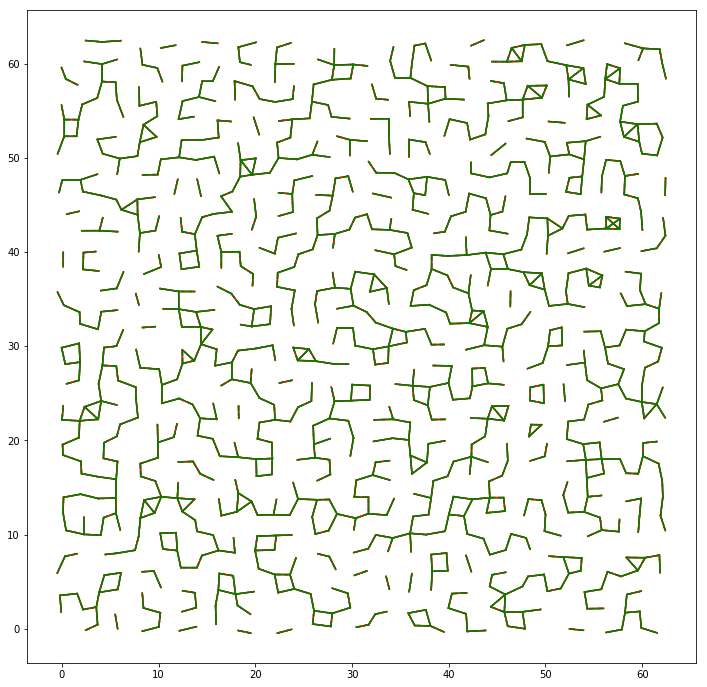

In [79]:
plt.figure(figsize=(12,12))
#cts2 == contacts2
for (idx,cts) in cts2.iteritems():
    #print idx, cts
    for idx2 in cts:
        plt.plot(pos2[[idx,idx2],0], pos2[[idx,idx2],1], 'r')
        
for (idx,cts) in cts2_old.iteritems():
    #print idx, cts
    for idx2 in cts:
        plt.plot(pos2[[idx,idx2],0], pos2[[idx,idx2],1], 'g--')

In [227]:
# Simple update step
dists = {}
def step(frac=0.5):
    dmin = 1e6
    dmax = 0
    updateContacts(pos2,cts2,dists)
    for (idx,cts) in cts2.iteritems():
        for idx2 in cts:
            v = pos2[idx,:]-pos2[idx2,:]
            d = dists[(idx,idx2)]
            pos2[idx,:] = pos2[idx,:] + (2.0-d)*v *frac
            #print "dx = ", (2.0-d)*v *frac

    if len(dists):
        print np.min(dists.values())

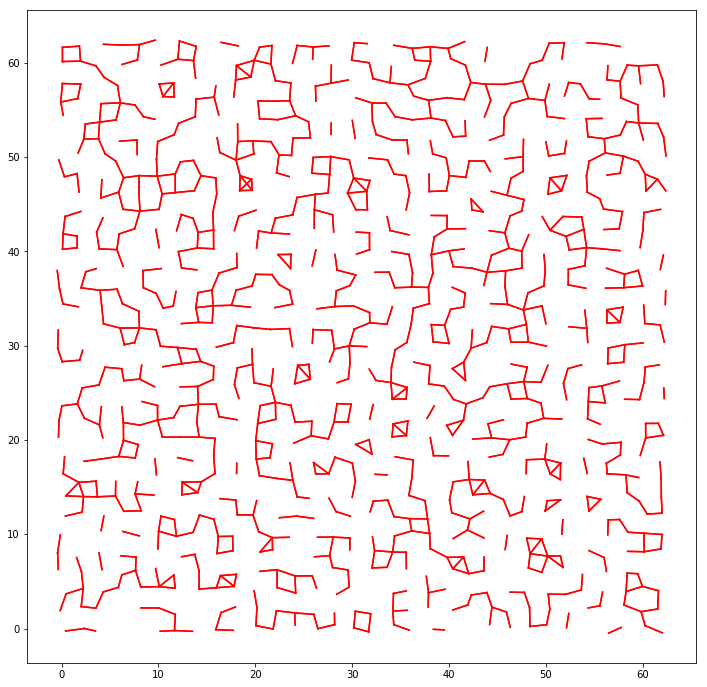

In [205]:
plt.figure(figsize=(12,12))
#cts2 == contacts2
for (idx,cts) in cts2.iteritems():
    #print idx, cts
    for idx2 in cts:
        plt.plot(pos2[[idx,idx2],0], pos2[[idx,idx2],1], 'r')

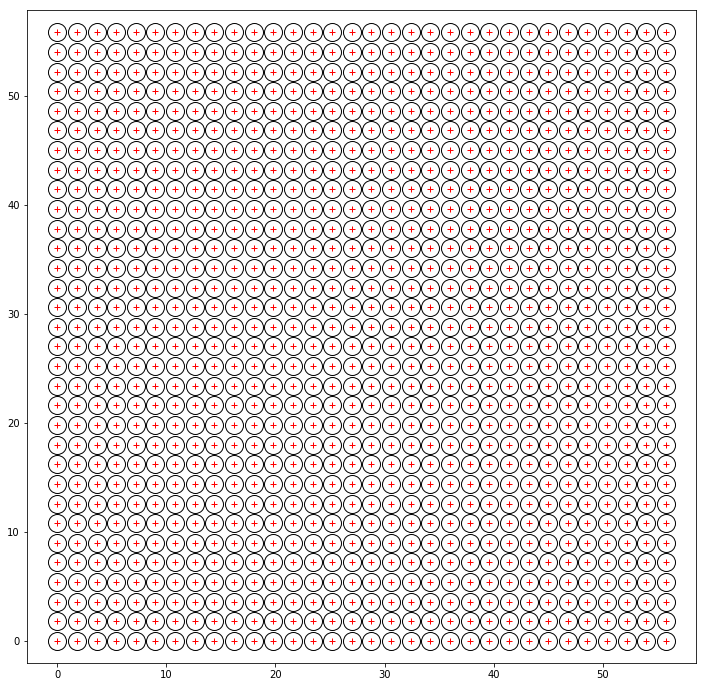

In [228]:
plt.figure(figsize=(12,12))

for i in range(1):
    #pos2 = pos2 + (np.random.random(size=pos2.shape)-0.5)
    while len(dists) and np.min(dists.values())<1.99:
        step(0.5)
    if len(dists):
        print np.min(dists.values())
    plt.plot(pos2[:,0], pos2[:,1],  'ko', markersize=18, mfc='none')
    plt.axis('equal')
    plt.plot(pos2_init[:,0], pos2_init[:,1],  'r+', markersize=6, mfc='none')
    #print np.max(pos2-pos2_init)

In [207]:
print cts2

{0: Set([32]), 1: Set([2]), 2: Set([1, 34]), 3: Set([4]), 4: Set([3, 5]), 5: Set([4]), 6: Set([38]), 7: Set([40, 39]), 8: Set([40, 9]), 9: Set([8]), 10: Set([11]), 11: Set([10, 12]), 12: Set([11, 44]), 13: Set([]), 14: Set([46, 15]), 15: Set([16, 14]), 16: Set([15]), 17: Set([49, 18]), 18: Set([17, 19]), 19: Set([18]), 20: Set([52, 21]), 21: Set([20, 53, 22]), 22: Set([21, 54]), 23: Set([]), 24: Set([56, 25]), 25: Set([24]), 26: Set([]), 27: Set([28]), 28: Set([27, 60, 29]), 29: Set([28, 61]), 30: Set([62, 31]), 31: Set([30, 63]), 32: Set([0, 64]), 33: Set([65, 34]), 34: Set([33, 2, 35]), 35: Set([34, 36]), 36: Set([35]), 37: Set([]), 38: Set([6, 39]), 39: Set([40, 71, 38, 7]), 40: Set([8, 72, 39, 7]), 41: Set([73]), 42: Set([]), 43: Set([75, 44]), 44: Set([43, 12, 45]), 45: Set([44, 77]), 46: Set([14, 47]), 47: Set([46]), 48: Set([]), 49: Set([17]), 50: Set([82, 51]), 51: Set([50, 83]), 52: Set([20, 53]), 53: Set([52, 21]), 54: Set([22]), 55: Set([56]), 56: Set([24, 55]), 57: Set([58]

In [208]:
print dists

{}
